<a href="https://colab.research.google.com/github/Aayushi-Sharma24/TedTalks_Views_Prediction_Regression/blob/main/AS_Ted_Talks_Views_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ted Talk Views Prediction**

###TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

###**Dataset Information**
* Number of observations: 4,005
* Number of features: 19

###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk

###**Target Variable :**
* **'views'**: Count of views



##Objective
###The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

#Data Preparation
###Let's import the required libraries that we will be using in this project

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

##Importing the dataset into the notebook

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Let's Download the dataset to use it as a pandas dataframe

In [ ]:
#loading the dataset and creating a dataframe
path='/content/drive/MyDrive/Colab Notebooks/Projects -Draft/ML-Regression/data_ted_talks.csv'
df=pd.read_csv(path)

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


##Let's Explore the DataFrame
###Looking into shape of data to find out number of rows and columns

In [ ]:
# check number of rows and column
df.shape

(4005, 19)

*   No of rows = 4005
*   No of columns = 19


### Let's have  look at all the features  present in our DataFrame

In [ ]:
# check all column names
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# check datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* **There are only 3 numerical columns in the dataset out of which 1 is target variable and 2 can be used as features and rest all columns are categorical columns** 
* **main goal here is to find or generate some numerical columns from these columns.**

In [ ]:
#checking the statistical details of all features
df.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,My journey from Marine to actor,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{592: 'Escaping the Khmer Rouge', 1554: ""The v...",https://www.ted.com/talks/matthew_winkler_what...,"We are all connected by the spectacular birth,...",When I was five years old I fell in love with ...
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


###Let's have a look if there are any duplicate rows

In [ ]:
# check for duplicate rows
df.duplicated().sum()

0

There are no duplicated rows

##Checking  null values

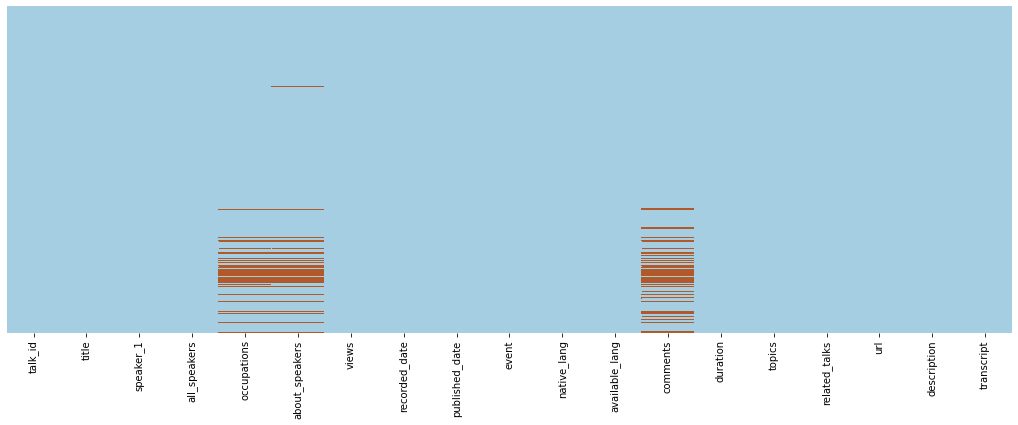

In [ ]:
# check for Null values
plt.rcParams['figure.figsize'] = (18, 6)
sns.heatmap(df.isnull(), cbar=False,yticklabels=False,cmap='Paired')

In [ ]:
df.isna().sum().sort_values(ascending=False)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
transcript          0
published_date      0
title               0
speaker_1           0
views               0
event               0
description         0
native_lang         0
available_lang      0
duration            0
topics              0
related_talks       0
url                 0
talk_id             0
dtype: int64

#####Comments column has the highest number of null values followed by occupations and about_speakers

In [ ]:
# drop url column
df = df.drop(columns=['url'])

dropping url, as it is of no use in the model

# Exploratory Analysis and Visualization

##Overview of Speaker column

####Who are the speakers of top 5 most watched TED talks?

In [ ]:
popular_df = df.nlargest(5, ['views'])
popular_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


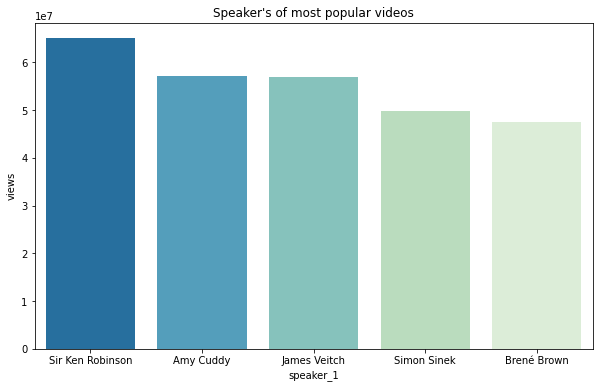

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular videos")
sns.barplot(x='speaker_1', y='views', data=popular_df,palette="GnBu_r")

* Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk with more than 65 million views.
* There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.

###Who is the most popular speaker  according to total views on their talks?

In [ ]:
popular_speaker_df = df.groupby('speaker_1').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


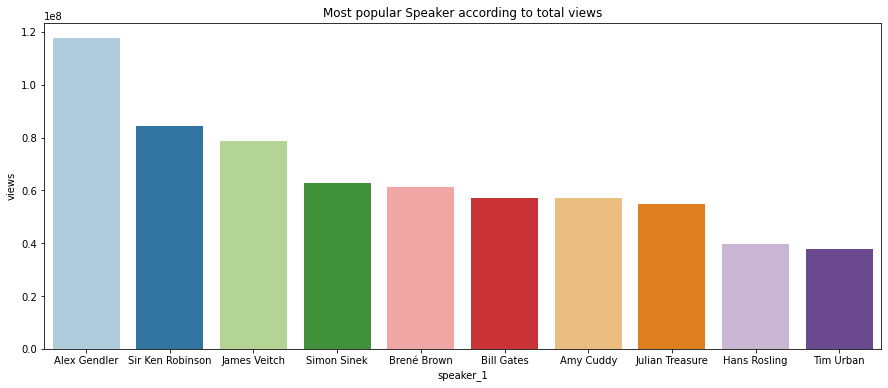

In [ ]:
#Plotting data using barplot
plt.figure(figsize=(15,6))
plt.title('Most popular Speaker according to total views')
sns.barplot(x='speaker_1', y='views', data=popular_speaker_df,palette='Paired')

Alex Gendler is the most popular speaker followed by Sir Ken Robinson

##Overview of Event Column 
####Let's find out which is the most frequent and most popular event in TED?

In [ ]:
#find most frequent event
popular_event_df = df.groupby('event').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


In [ ]:
#find most popular event
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views']).reset_index()
pop_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


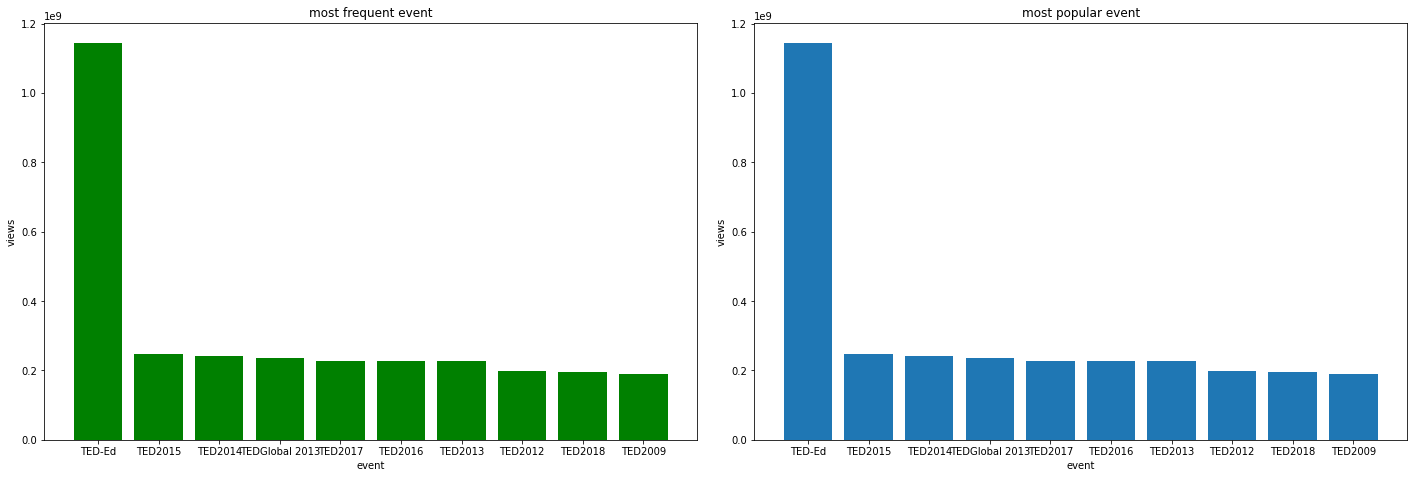

In [ ]:
# Plotting both graphs
#setting x and y values in the plot
x = popular_event_df['event']
y = popular_event_df['views']
x1 = pop_event_df['event']
y1 = pop_event_df['views']

plt.subplots(figsize=(20, 7))
 
# using subplot function and creating plot one
plt.subplot(1, 2, 1)
plt.bar(x, y, color='green')
plt.title('most frequent event')
plt.xlabel('event')
plt.ylabel('views')
 
# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.bar(x1, y1)
plt.title('most popular event')
plt.xlabel('event')
plt.ylabel('views')
# space between the plots
plt.tight_layout(2)
 
# show plot
plt.show()

TED-Ed is the most popular and frequent event

##Overview of title column
####Let's explore the most frequent words in title

In [ ]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


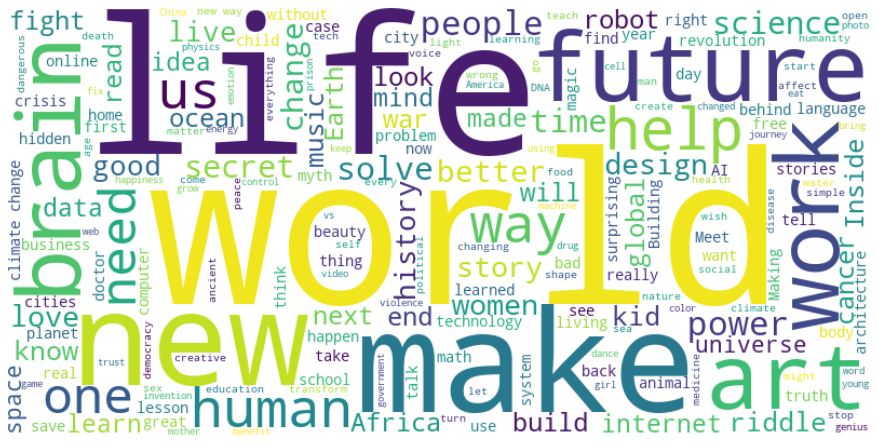

In [ ]:
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Majority of Titles contains words like life, world, make, new, future, art.

###Which is the most popular title w.r.t views?

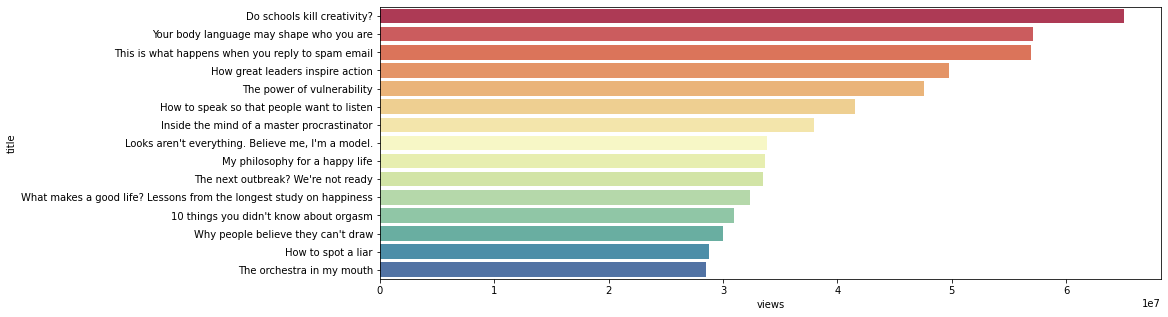

In [ ]:
popular_title = df[['title','views']].groupby('title').agg({'views' : 'mean'}).reset_index().sort_values(by=['views'],ascending=False).head(15)
plt.rcParams["figure.figsize"] = (14,5)
sns.barplot(x='views',y='title',data=popular_title,palette='Spectral')

#####Most popular title is "Do schools kill creativity?" with 60+ million views

###Let's have a look at most popular topic tags

There are 404126 words in the combination of all topics.


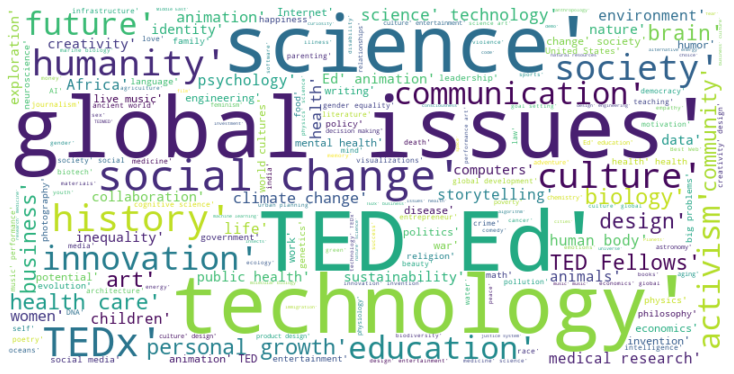

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Most popular tags are global issues, technology, science Ted ED, social change

##Overview of Occupations column

In [ ]:
#replacing Nan values of occupations column with other 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})

#applying eval function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)
#defining a new feature called occupation
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)

In [ ]:
#Checking the number of unique occupation in event column.
len(df['occupation'].unique())

1552

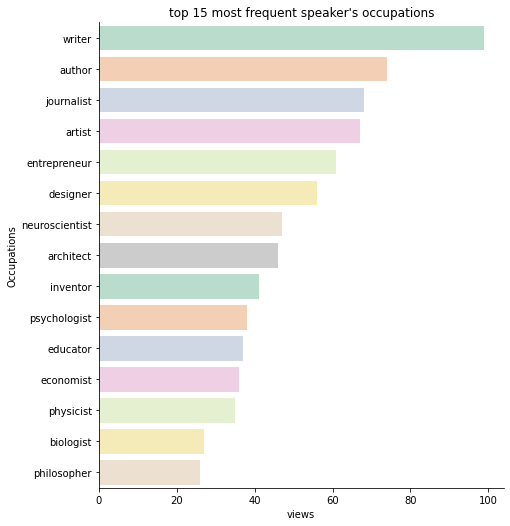

In [ ]:
#Printing the top 15 most frequent speaker's occupations
occ_df=df[df['occupation']!='O']
plt.rcParams["figure.figsize"] = (15,4)
a=sns.catplot(data = occ_df, y = occ_df['occupation'].value_counts(ascending=False).head(15).index,x = occ_df['occupation'].value_counts(ascending=False).head(15).values,kind='bar' ,height = 7, aspect=1,palette="Pastel2")
a.set(xlabel='views',ylabel='Occupations')
a.set(title="top 15 most frequent speaker's occupations")

Most of the speakers are writer followed by author and journalist.

##Overview of published_date 

###Extracting day,month and year from published_date column

In [ ]:
#applying strptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

#extracting release day, month and year from the published date column
df['published_date_day'] = df['published_date'].apply(lambda x: x.weekday())
df['published_date_month']=df['published_date'].apply(lambda x: x.month)
df['published_date_year'] = df['published_date'].apply(lambda x: x.year)

In [ ]:
#encoding of published_date_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['published_date_day']=df['published_date_day'].map(week_day)

###checking which day of the month has max releases

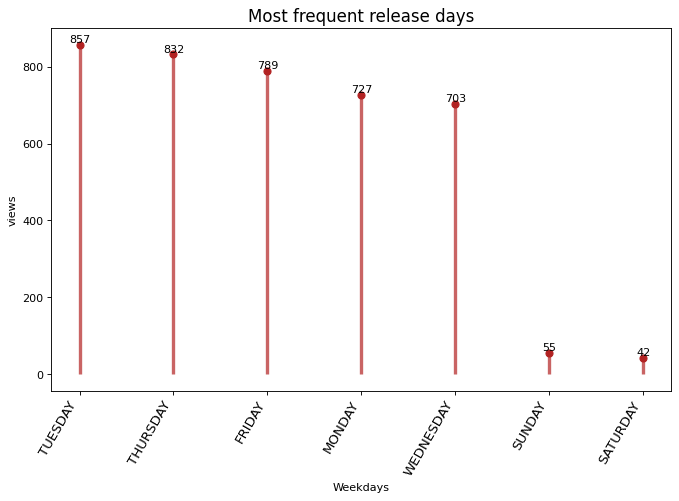

In [ ]:
#checking the day of the month having maximum release date 
freq_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=freq_rel_day.index, ymin=0, ymax=freq_rel_day.views, color='firebrick', alpha=0.7, linewidth=3)
ax.scatter(x=freq_rel_day.index, y=freq_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(freq_rel_day.index)
ax.set_xticklabels(freq_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("Most frequent release days",fontsize=15)
# Printing the count in graph
for row in freq_rel_day.itertuples():
    ax.text(row.Index, row.views+.5, s=round(row.views, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)
# Show the object
plt.xlabel('Weekdays')
plt.ylabel('views')
plt.show()

Most frequent releases are on Tuesday

###Let's check the best release day of the week with respect to average views

Text(0, 0.5, 'views')

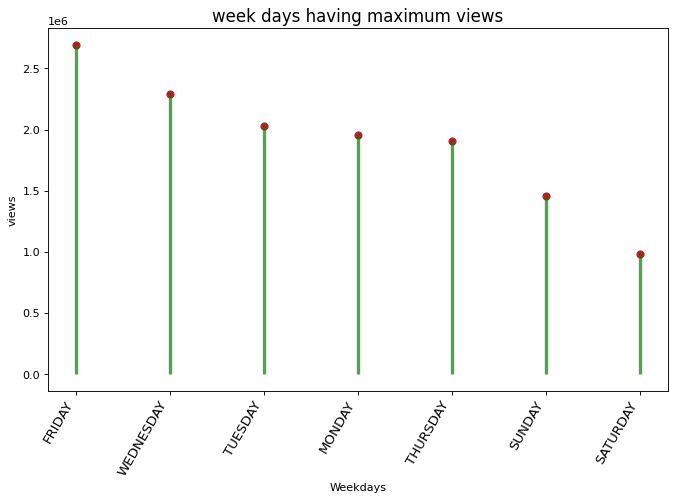

In [ ]:
#checking popular release day wrt views
pop_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=pop_rel_day.index, ymin=0, ymax=pop_rel_day.views, color='green', alpha=0.7, linewidth=3)
ax.scatter(x=pop_rel_day.index, y=pop_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(pop_rel_day.index)
ax.set_xticklabels(pop_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("week days having maximum views",fontsize=15)
plt.xlabel('Weekdays')
plt.ylabel('views')

* **Most videos are published on Tuesday followed by Thursday.**
* **But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.**
* **Friday release is impacting the views of the video**

In [ ]:
#encoding of published_date_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['published_date_month']=df['published_date_month'].map(month_dict)

###Which month has max releases?

In [ ]:
#checking months having maximum release 
freq_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
freq_rel_month

,published_date_month,views
0,April,423
1,March,419
2,Feb,412
3,Oct,350
4,Jan,348
5,Sep,347
6,May,312
7,June,310
8,Nov,305
9,July,278


###Which month has highest average views?

In [ ]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
pop_rel_month

,published_date_month,views
0,March,2.644200e+06
1,May,2.449977e+06
2,Sep,2.224862e+06
3,April,2.180815e+06
4,Feb,2.135949e+06
5,July,2.127899e+06
6,June,2.125505e+06
7,Dec,2.109443e+06
8,Jan,2.014319e+06
9,Oct,1.909282e+06


###Plotting both graphs

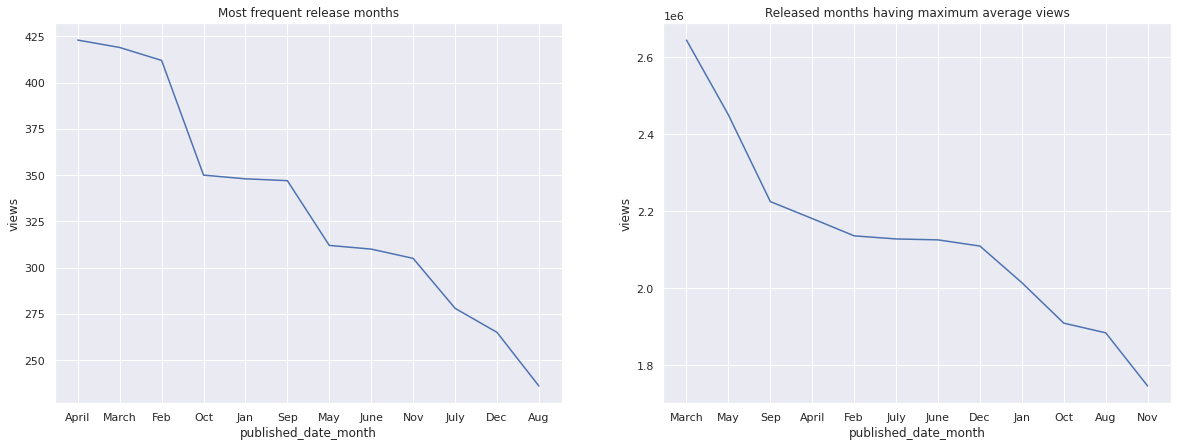

In [ ]:
# plotting the months having maximum release 
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

#plotting most popular release month according to average Views
plt.subplot(1,2,2)
plt.title('Released months having maximum average views')
sns.lineplot(x='published_date_month',y='views',data=pop_rel_month)
plt.show()

April have maximum released videos, But the videos released in March are more popular 

In [ ]:
#checking years having maximum release 
freq_rel_year=df[['published_date_year','views']].groupby('published_date_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)
freq_rel_year

,published_date_year,views
0,2019,702
1,2018,477
2,2017,315
3,2012,303
4,2011,255
5,2013,242
6,2016,242
7,2014,240
8,2010,230
9,2015,220


In [ ]:
#Printing the most popular release years according to AVERAGE Views
pop_rel_year=df[['published_date_year','views']].groupby('published_date_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)
pop_rel_year

,published_date_year,views
0,2006,4.937003e+06
1,2013,3.012435e+06
2,2015,2.806775e+06
3,2016,2.734725e+06
4,2014,2.423564e+06
5,2012,2.196281e+06
6,2010,2.188767e+06
7,2017,2.160378e+06
8,2009,2.071610e+06
9,2019,1.939608e+06


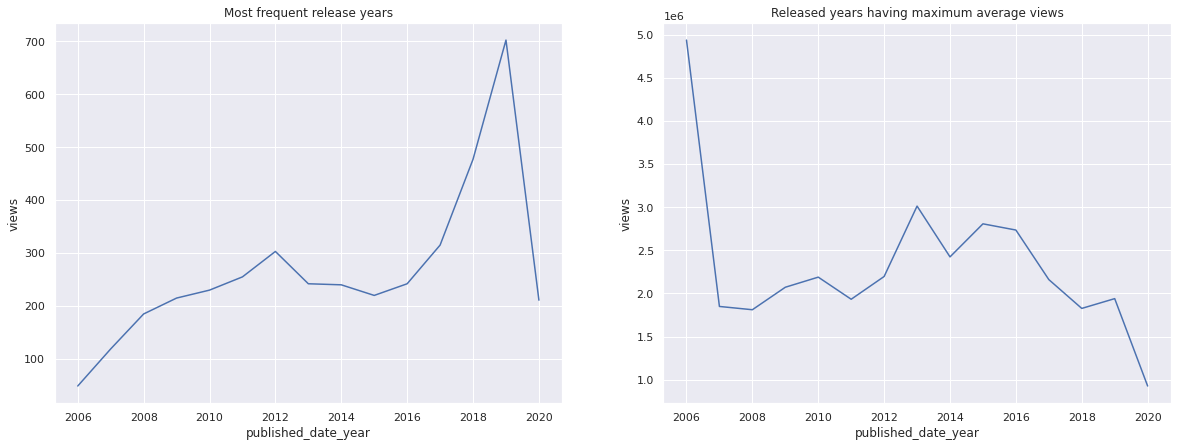

In [ ]:
#Plotting the years having maximum release 
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

#Plotting most popular release years according to AVERAGE Views 
plt.subplot(1,2,2)
plt.title('Released years having maximum average views')
sns.lineplot(x='published_date_year',y='views',data=pop_rel_year)

* **Most videos are published in 2019 followed by 2018 and 2017.**
* **But the videos published in 2006 are most viewed followed by 2013.**

##Exploring numerical features

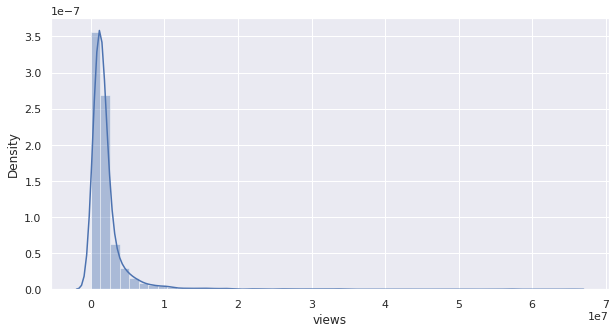

In [ ]:
#plotting the distplot of target variable
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

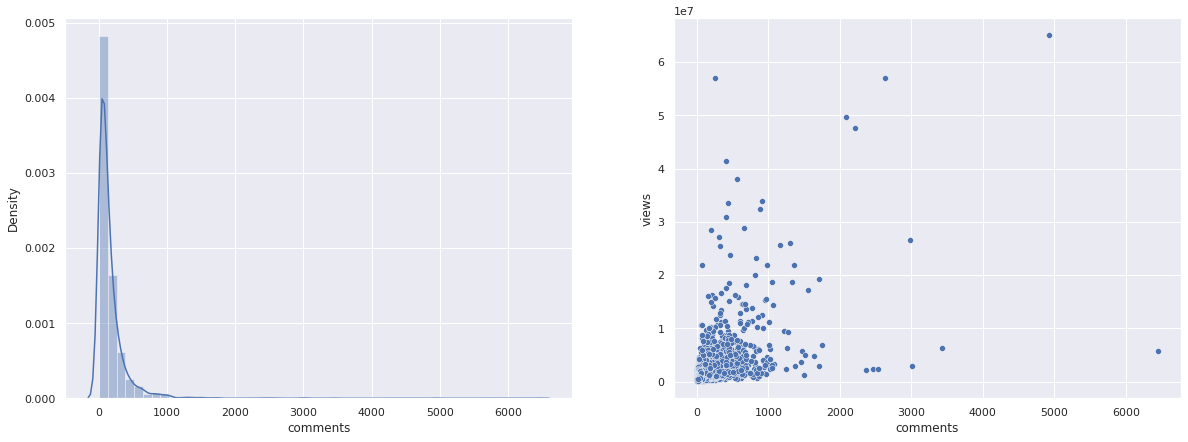

In [ ]:
##plotting the distplot of comments
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.distplot(df['comments'])

##plotting the scatterplot of comments
plt.subplot(1,2,2)
sns.scatterplot(x=df['comments'],y=df['views'],data=df)

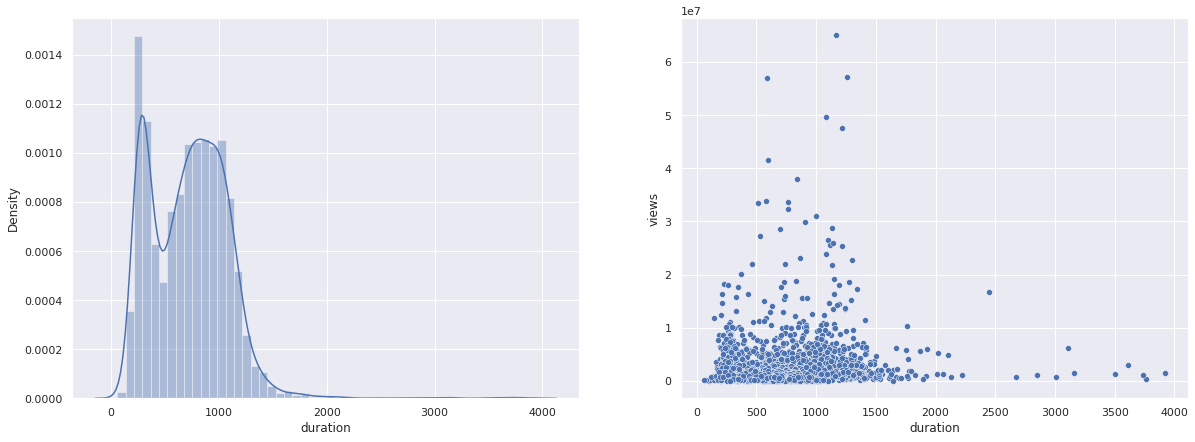

In [ ]:
#plotting the distplot of duration
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.distplot(df['duration'])

##plotting the scatterplot of duration
plt.subplot(1,2,2)
sns.scatterplot(x=df['duration'],y=df['views'],data=df)

##Feature Engineering

###Speaker_1 column

###since there is high number of cardinality in Speaker_1 Column, therefore applying mean encoding 

In Mean Encoding each distinct value of categorical value is replaced with average value of target variable.

In [ ]:
#Applying Mean Encoding on speaker_1 column
mean_encoding = df.groupby('speaker_1')['views'].mean().to_dict()
df['speaker_1_avg_views']=df['speaker_1'].map(mean_encoding)

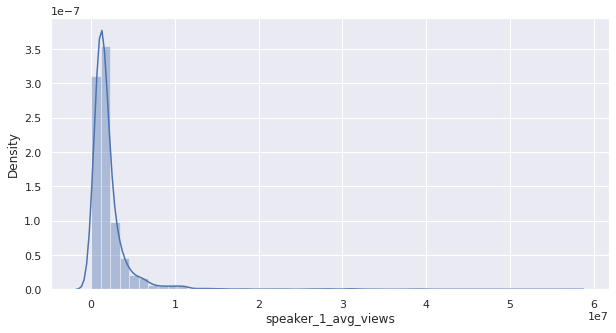

In [ ]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])


##Event column

###Event column also faces high cardinality, therefore applying mean encoding

In [ ]:
#Applying Mean Encoding on event column
mean_encoding = df.groupby('event')['views'].mean().to_dict()
df['event_wise_avg_views']=df['event'].map(mean_encoding)

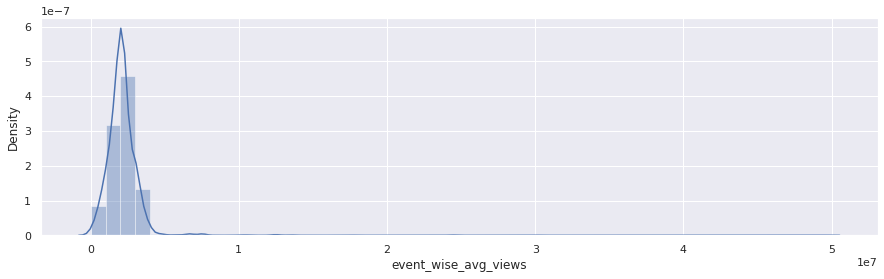

In [ ]:
#Plotting the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'])

###Topics column

In [ ]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

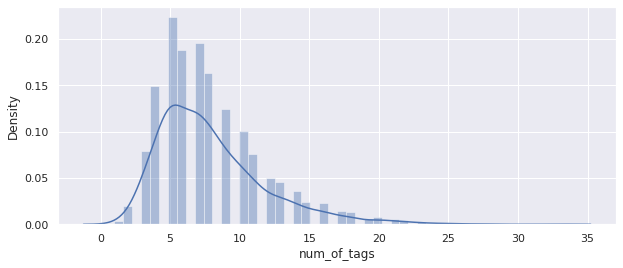

In [ ]:
#applying eval function on topics column and calculating length
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

#Plotting data using distplot
plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])

In [ ]:
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)
      
len(unique_topics)

#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

topics_avg_views = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = topics_avg_views.values

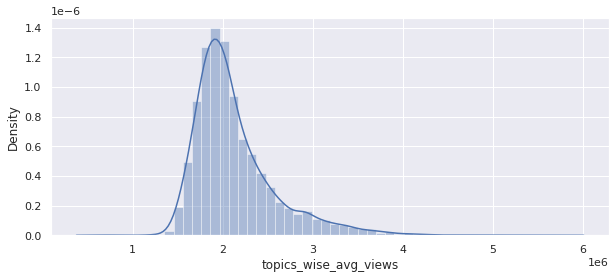

In [ ]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])

###Available language column

In [ ]:
#applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)
len(df['available_lang'][10])

26

In [ ]:
#calculating number of language in each observation
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)
df['num_of_lang'].head()

0    43
1    49
2    26
3    35
4    62
Name: num_of_lang, dtype: int64

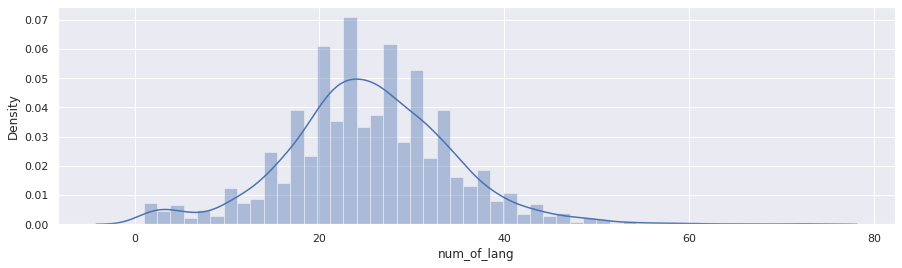

In [ ]:
sns.distplot(df['num_of_lang'])

In [ ]:
#calculating video age from published_date_year
df['video_age']=2021-df['published_date_year']
# dropping published_date as it is of no use now
df=df.drop(columns='published_date')

In [ ]:
#applying eval function on available_lang column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)
df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

In [ ]:
#defining a new feature called related_views
df['related_talks_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_talks_views']=temp//6

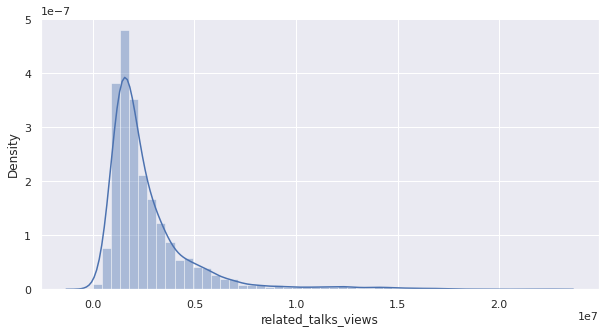

In [ ]:
#Let's plot the related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_talks_views'])

##Data Cleaning

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'description', 'transcript', 'occupation', 'published_date_day',
       'published_date_month', 'published_date_year', 'speaker_1_avg_views',
       'event_wise_avg_views', 'num_of_tags', 'topics_wise_avg_views',
       'num_of_lang', 'video_age', 'related_talks_views'],
      dtype='object')

In [ ]:
#dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'event', 'native_lang', 'available_lang' ,'recorded_date','topics','related_talks','transcript', 'occupation' ,'description','published_date_year', 'published_date_day', 'published_date_month'],inplace=True)

##Outlier Treatment

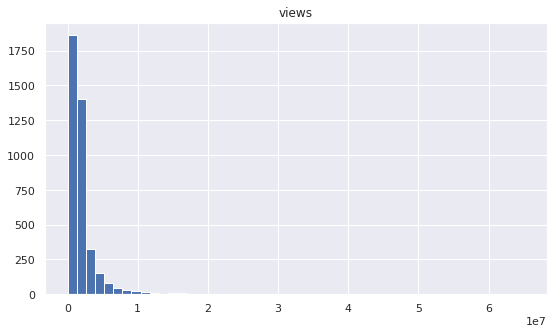

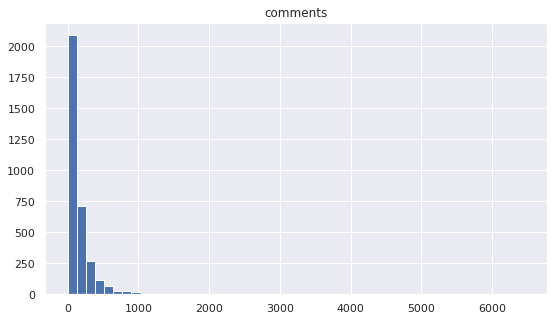

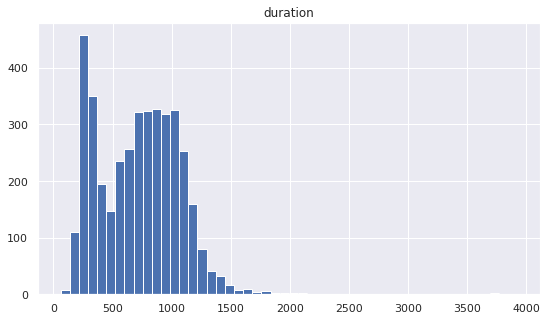

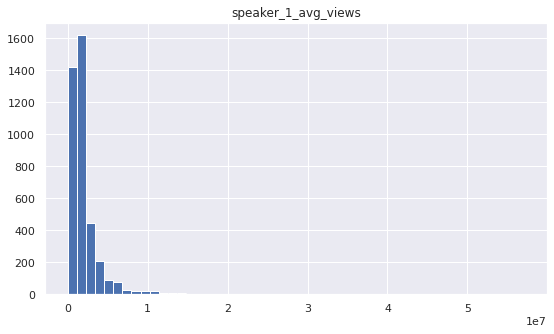

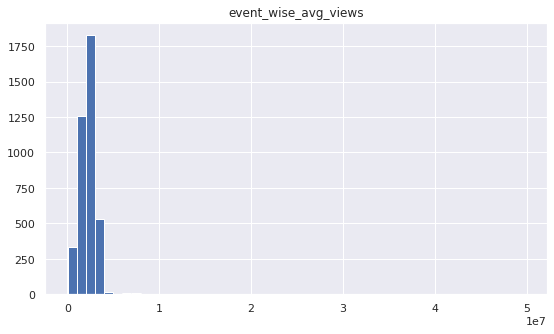

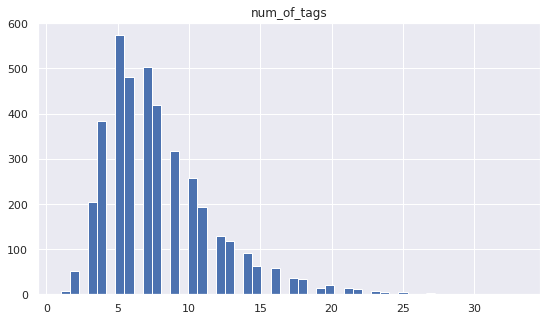

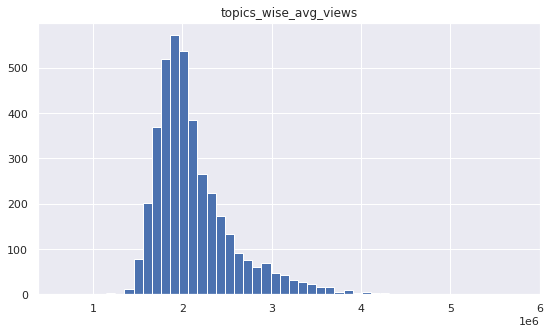

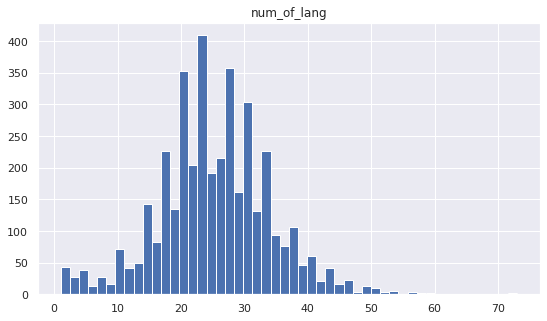

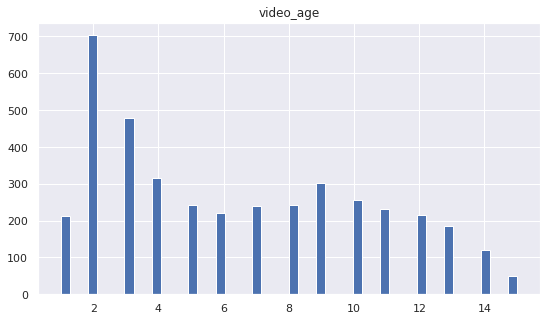

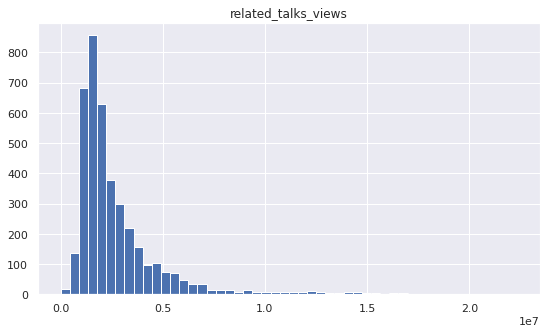

In [ ]:
#Plotting histplot for all numeric columns
numeric_features = df.describe().columns

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax) 
    ax.set_title(col)
plt.show()

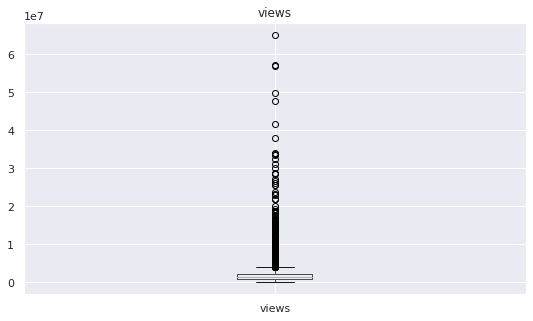

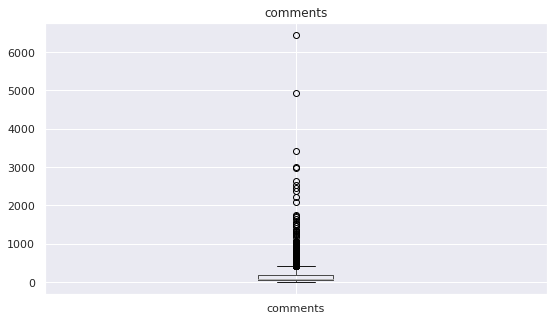

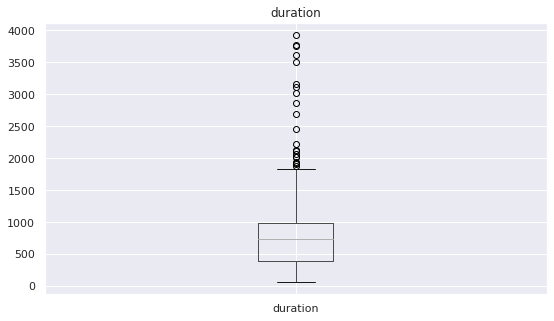

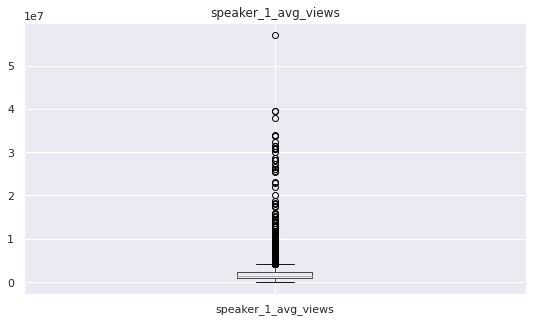

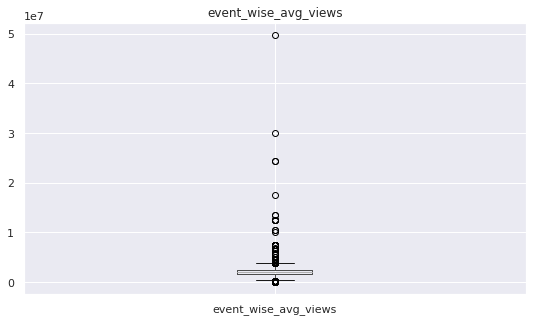

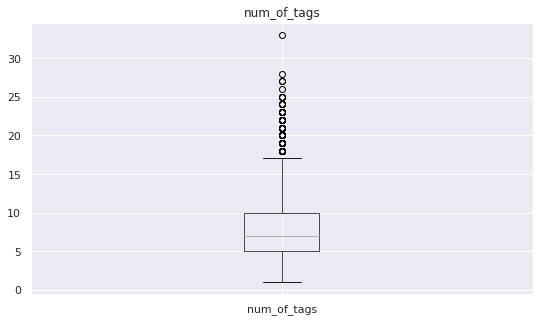

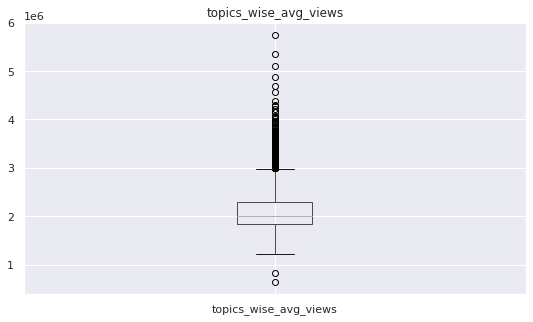

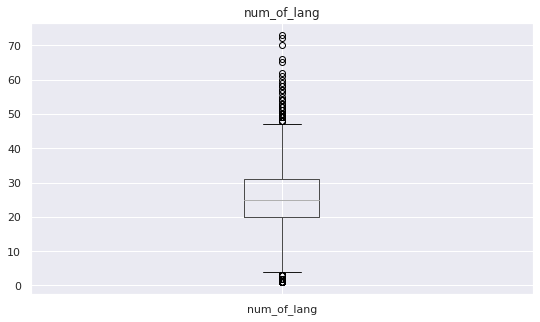

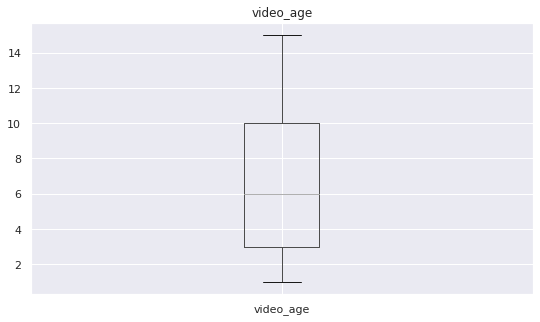

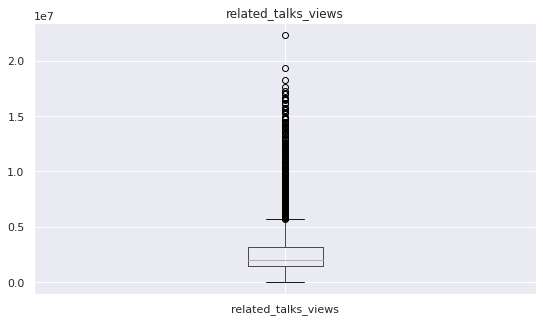

In [ ]:
#Plotting boxplot for all numeric columns to check outliers
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    df.boxplot(column=col) 
    ax.set_title(col)
plt.show()

In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

views                    393
comments                 261
duration                  21
speaker_1_avg_views      373
event_wise_avg_views     156
num_of_tags              116
topics_wise_avg_views    242
num_of_lang              121
video_age                  0
related_talks_views      300
dtype: int64

In [ ]:
# Replacing outliers with extreme values
for i in ['comments','duration','num_of_lang','num_of_tags','related_talks_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [ ]:
#Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

views                    0
comments                 0
duration                 0
speaker_1_avg_views      0
event_wise_avg_views     0
num_of_tags              0
topics_wise_avg_views    0
num_of_lang              0
video_age                0
related_talks_views      0
dtype: int64

Now, there are no outliers present

In [ ]:
#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

In [ ]:
X.head(2)

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_tags,topics_wise_avg_views,num_of_lang,video_age,related_talks_views
0,272.0,977.0,2190599.25,3.778944e+06,9.0,1750846.0,43.0,15,1659584.0
1,413.0,1190.0,3987156.10,3.778944e+06,11.0,2290338.0,47.5,15,1573950.0


##Null value treatment

In [ ]:
#checking for null values
X.isna().sum()

comments                 655
duration                   0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_tags                0
topics_wise_avg_views      0
num_of_lang                0
video_age                  0
related_talks_views        0
dtype: int64

Null values present in comments column

In [ ]:
#Taking features for using in KNNImputer
outlier_df=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

###Using KNNImputer to impute missing values

In [ ]:
# Before applying KNNImputer, we have to scale features to avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_df]))
# transform the dataset
X[outlier_df] = imputer.transform(scaler.fit_transform(X[outlier_df]))
#again applying inverse_transform on the data
X[outlier_df] = scaler.inverse_transform(X[outlier_df])

In [ ]:
#let's check for nan values again
X.isna().sum()

comments                 0
duration                 0
speaker_1_avg_views      0
event_wise_avg_views     0
num_of_tags              0
topics_wise_avg_views    0
num_of_lang              0
video_age                0
related_talks_views      0
dtype: int64

####Now there are no Null values

##Transformations

###Applying various transformations on numeric columns to convert data to normal distribution 

In [ ]:
#import libraries
import scipy.stats as stat
import pylab

In [ ]:
# Let's plot Q-Q plot for numeric features
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

###Q Q Plots (Quantile-Quantile plots) are plots of two quantiles against each other. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.

##Q-Q plot for comments

before transformation

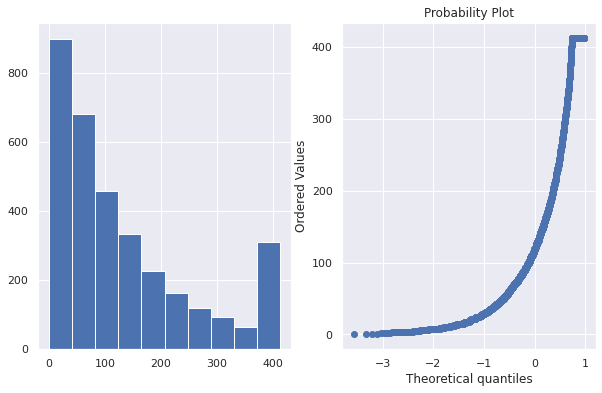

In [ ]:
plot_data(df,'comments')

After transformation

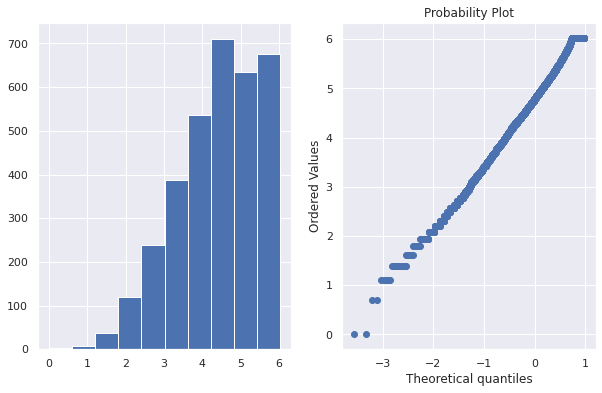

In [ ]:
# applying log transformation
df['comments']=np.log1p(df['comments'])
plot_data(df,'comments')

###Q-Q plot for duration

Before transformation

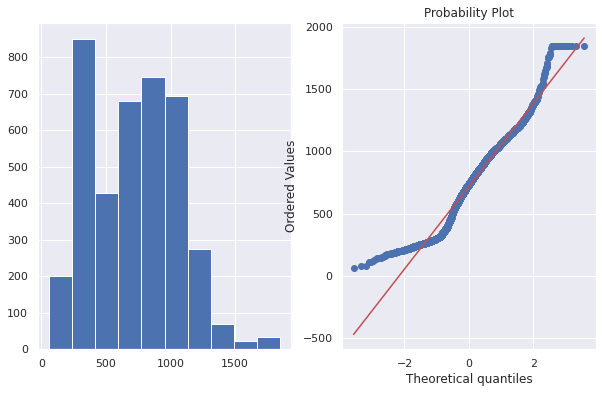

In [ ]:
plot_data(df,'duration')

After transformation

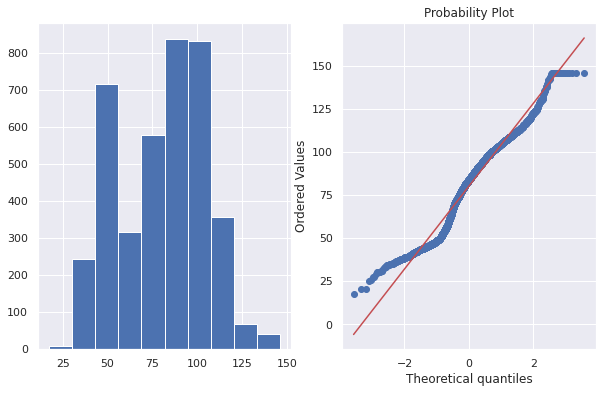

In [ ]:
# applying boxcox transformation
df['duration'],parameters=stat.boxcox(df['duration'])
plot_data(df,'duration')

###Q-Q plot for Event_wise_avg_views

before transformation

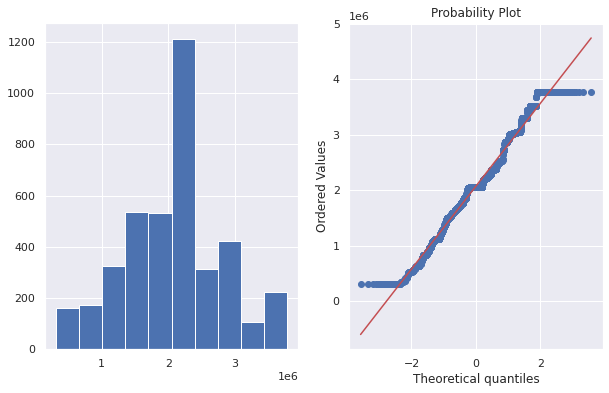

In [ ]:
plot_data(df,'event_wise_avg_views')

After transformation

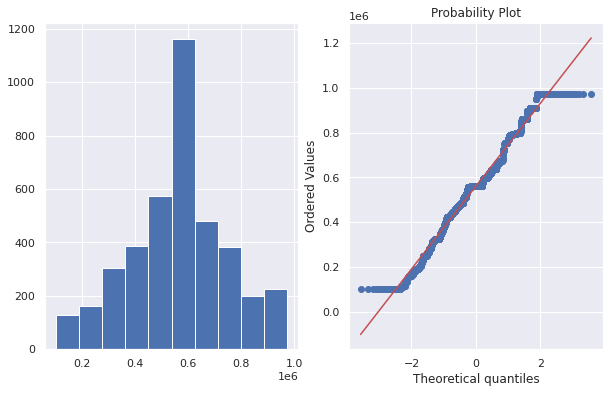

In [ ]:
# applying boxocox transformation
df['event_wise_avg_views'],parameters=stat.boxcox(df['event_wise_avg_views'])
plot_data(df,'event_wise_avg_views')

###Q-Q plot for num_of_tags

before transformation

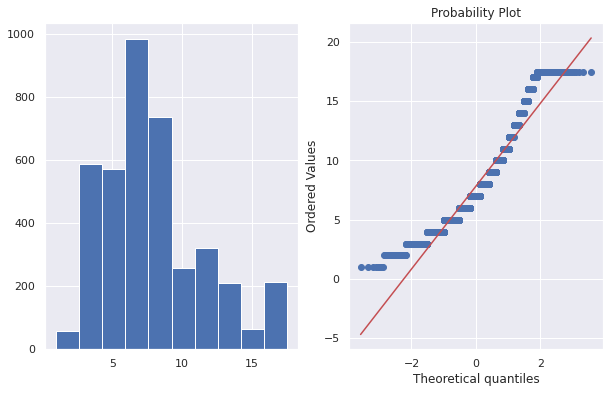

In [ ]:
plot_data(df,'num_of_tags')

After transformation

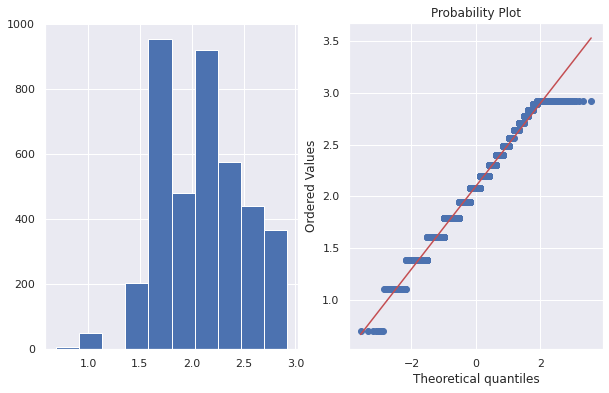

In [ ]:
# applying log transformation
df['num_of_tags']=np.log1p(df['num_of_tags'])
plot_data(df,'num_of_tags')

###Q-Q plot for topics_wise_avg_views

before transformation

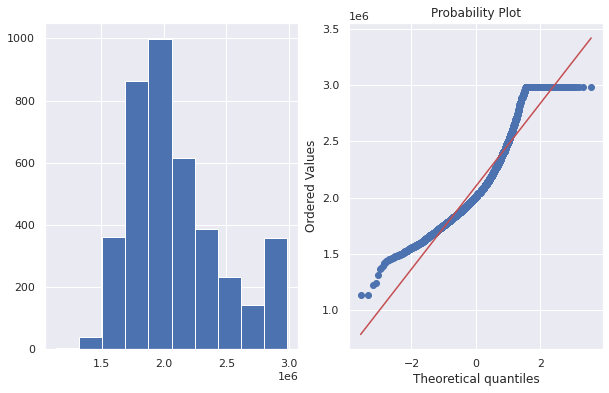

In [ ]:
plot_data(df,'topics_wise_avg_views')

After transformation

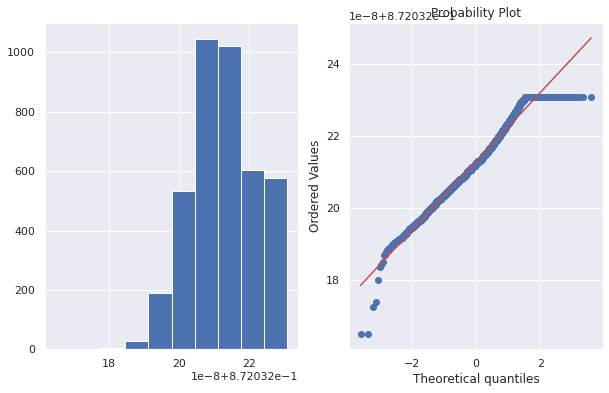

In [ ]:
# applying boxcox transformation
df['topics_wise_avg_views'],parameters=stat.boxcox(df['topics_wise_avg_views'])
plot_data(df,'topics_wise_avg_views')

###Q-Q plot for num_of_lang

before transformation

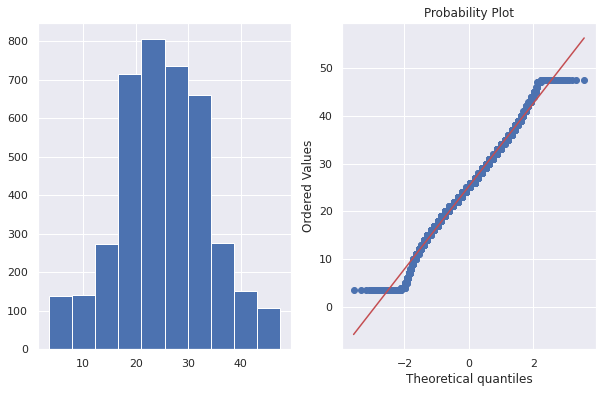

In [ ]:
plot_data(df,'num_of_lang')

After transformation

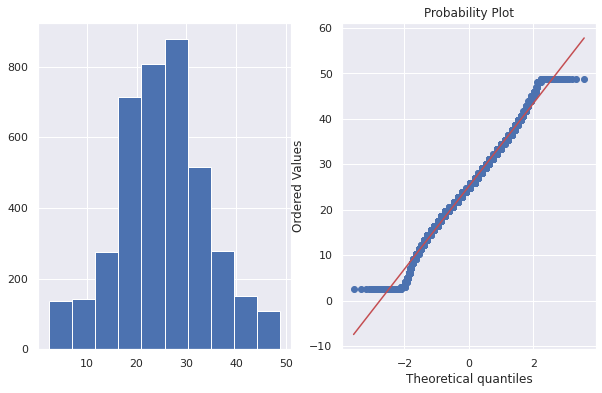

In [ ]:
# applying boxcox transformation
df['num_of_lang'],parameters=stat.boxcox(df['num_of_lang'])
plot_data(df,'num_of_lang')

###Q-Q plot for video_age

before transformation

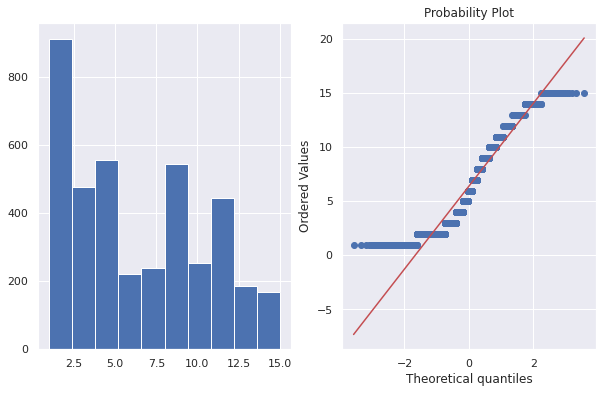

In [ ]:
plot_data(df,'video_age')

After transformation

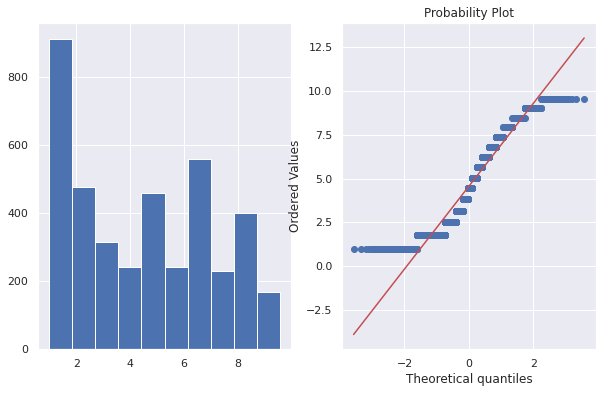

In [ ]:
# applying exponential transformation
df['video_age']=df.video_age**(1/1.2)
plot_data(df,'video_age')

###Q-Q plot for related_talks_views

before transformation

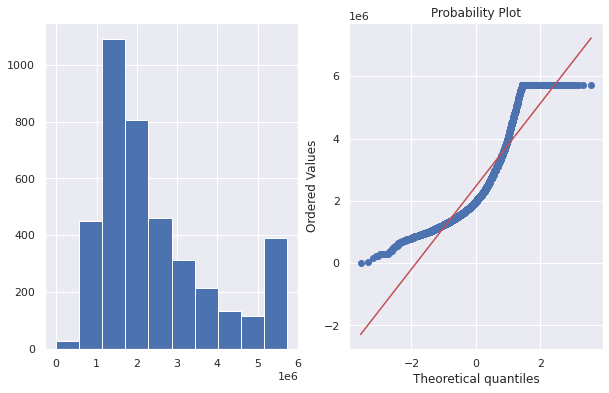

In [ ]:
plot_data(df,'related_talks_views')

After transformation

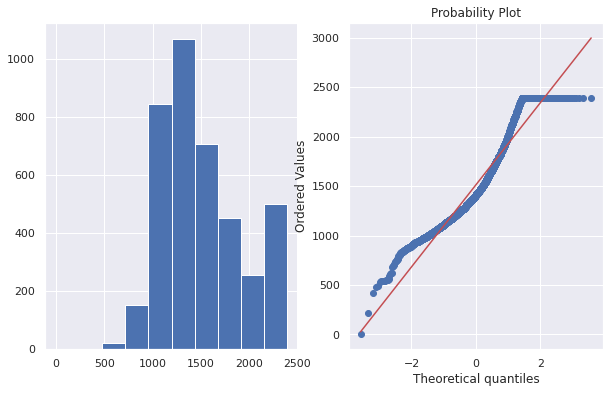

In [ ]:
# applying square root transformation
df['related_talks_views']=df.related_talks_views**(1/2)
plot_data(df,'related_talks_views')

###QQ plot after transformation of speaker_1_avg_views column

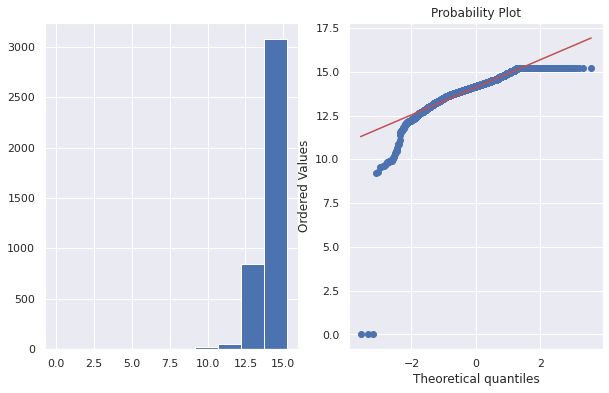

In [ ]:
# applying log transformation
df['speaker_1_avg_views']=np.log1p(df['speaker_1_avg_views'])
plot_data(df,'speaker_1_avg_views')

##Feature Selection

In [ ]:
#printing the shape of features
X.shape

(4005, 9)

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        2.22138034e+00, 8.21343686e+02, 9.43117088e+02, 7.26280093e-01,
        6.34241154e+02]),
 array([7.27669071e-290, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        1.36190106e-001, 1.81039118e-164, 3.67017071e-186, 3.94142602e-001,
        4.87581533e-130]))

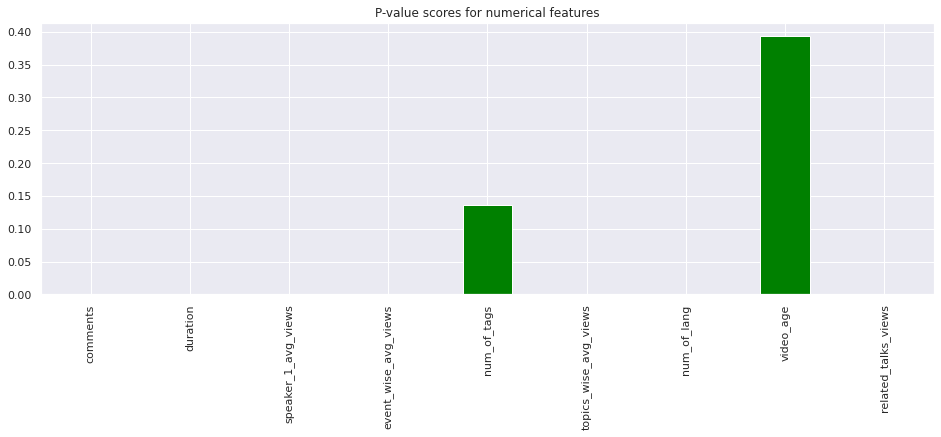

In [ ]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='green',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

In [ ]:
X.columns

Index(['comments', 'duration', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_tags', 'topics_wise_avg_views', 'num_of_lang', 'video_age',
       'related_talks_views'],
      dtype='object')

In [ ]:
#Let's take all the important features in a list.
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags','event_wise_avg_views',
       'related_talks_views', 'speaker_1_avg_views','topics_wise_avg_views']
len(ll)
#let's take the important features
X=X[ll]

##Correlation matrix

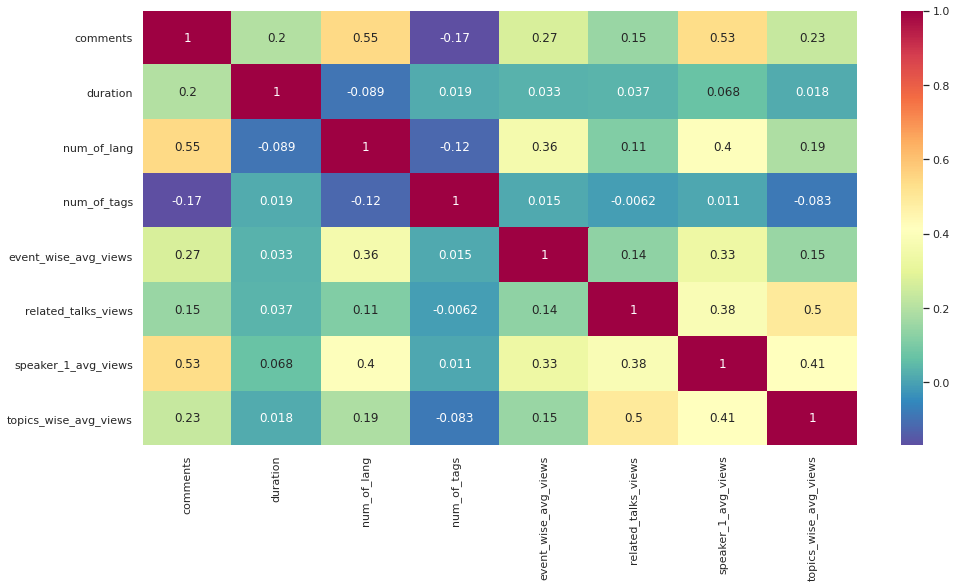

In [ ]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

###Train Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Fitting Regression model and Hypermetric Tuning

###Linear Regression model

In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test is 219668060390.61792
RMSE on test is 468687.59359579586
Training MAE: 269984.50
Test MAE: 261784.10


In [ ]:
reg.score(X_test,y_test)

0.8191986935070509

###RandomForest Regressor

In [ ]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 95352.14
Test MAE: 229986.63
Target mean: 1661354.12
Target std: 1102595.71


###Hypermetric tuning using RandomizedSearchCV

In [ ]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=150, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 195067.12
Test MAE: 200338.24


In [ ]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8228604839704982
For test set the R_Squared for RFforest is 0.8129976998024802 and adjusted R_Squared is 0.8126233208231057


In [ ]:
#Defining the model
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=150,n_estimators=100,random_state=None)]
      ]
#Let's run the the model and store the results in a dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,194448.312067,198446.460537,0.822242,0.813493,464841.027669,476025.460417


##Feature importance

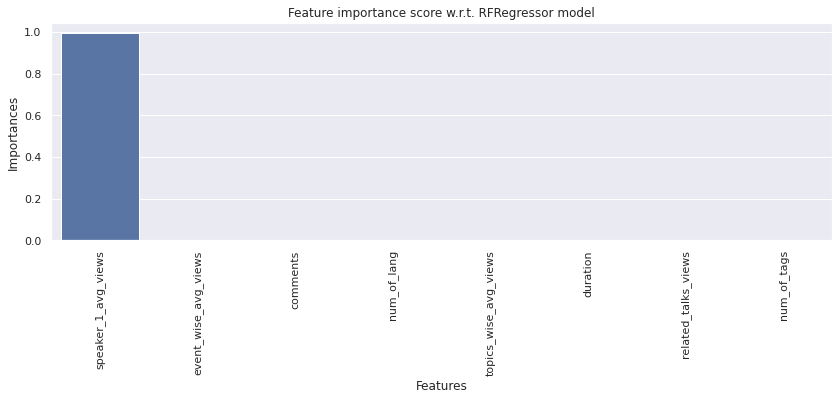

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

###XGBoost Regressor

In [ ]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

###Hypermetric tuning using RandomizedSearchCV

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[15:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.5s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[15:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[15:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[15:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[15:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.3s
[CV] n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [ ]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_leaf=50,
             min_samples_split=100, missing=None, n_estimators=50, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.9003193058046479
For test set the R_Squared for XGBoost is 0.8312618383055487 and adjusted R_Squared is 0.8309240241680222


In [ ]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 178306.07
Test MAE: 220603.95


In [ ]:
#Defining the model
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=50,
             min_samples_split=100, n_estimators=50)]         
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

[15:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,XGBRegressor:,178306.065248,220603.953167,0.900319,0.831262,348092.977714,452782.186293


##Feature importance

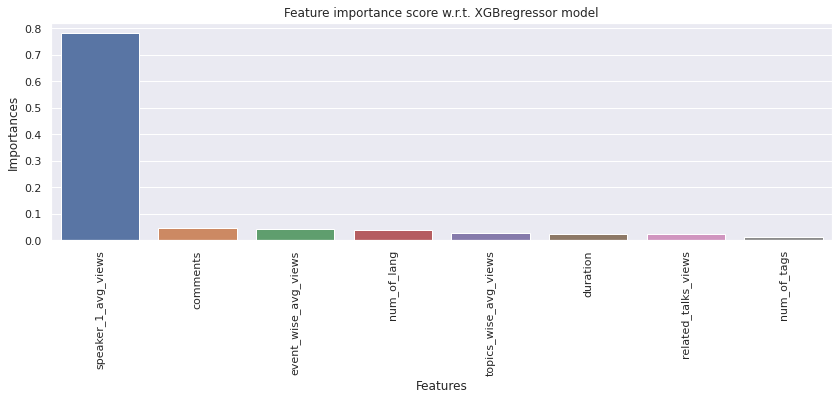

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

In [ ]:
#Defining all the models
models = [
           ['LinearRegression', LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=150,n_estimators=100,random_state=None)],    
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=50,
             min_samples_split=100, n_estimators=50)]          
        ]

In [ ]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))   
    curr_model_data['Adjusted_R2_score_train'] = 1 - (1-(r2_score(y_train,curr_model.predict(X_train))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    curr_model_data['Adjusted_R2_score_test'] = 1 - (1-(r2_score(y_test,curr_model.predict(X_test))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[10:07:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


##Results 

In [ ]:
#printing the results in dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,Adjusted_R2_score_train,Adjusted_R2_score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression,269984.503141,261784.096106,0.815410,0.819199,0.815040,0.818837,473690.117306,468687.593596
1,Lasso:,269984.449394,261784.044474,0.815410,0.819199,0.815040,0.818837,473690.117306,468687.580883
2,Ridge:,269984.309097,261783.907938,0.815410,0.819199,0.815040,0.818837,473690.117307,468687.543803
3,KNeighborsRegressor:,231054.636746,281932.195424,0.856594,0.783506,0.856306,0.783072,417516.848940,512868.181145
4,RandomForest,195778.092437,200421.823898,0.820603,0.812483,0.820244,0.812108,466978.892857,477312.422847
5,XGBRegressor:,178306.065248,220603.953167,0.900319,0.831262,0.900120,0.830924,348092.977714,452782.186293


##**Conclusion**



###Performed Exploratory data analysis on various features, then carried out feature engineering and encoding of categorical columns, handled missing values in the dataset, dealt with outliers present in the dataset , performed transformations like log, sqrt and boxcox on numerical features to convert them to gaussian distribution, then carried out feature selection and build various models 

###Following models have been used: 
* **Linear Regressor**
* **Random Forest Regressor**
* **XGB Regressor**

###Evaluated these models on various metrics like MSE, RMSE, MAE ,R2 score and Adjusted R2 score. Finally selected the best model out of these.

###In all these models our errors have been in the range of 2,00,000 which is around 10% of the average views. The model has been able to correctly predict views 90% of the time. After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate. Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection, correct model selection. 
###After evaluating the performance of all the models, the best model is Random Forest Regressor based on MAE because MAE is linear and robust to outliers.
